In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('steps.csv', sep=";")

df1.head(10)


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11436.0,7899.0,11731.0,14151.0,NaN,3996.0,2556.0,302.0,2442.0,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df2['weight'].describe()

count    927.000000
mean      72.833873
std       25.902717
min        6.000000
25%       61.000000
50%       71.000000
75%       81.000000
max      700.000000
Name: weight, dtype: float64

In [6]:
df2['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
101.0     1
20.0      1
700.0     1
37.0      1
6.0       1
Name: weight, Length: 72, dtype: int64

In [11]:
df2['age'].describe()

count       929
unique        6
top       25-34
freq        426
Name: age, dtype: object

In [6]:
df2['weight'].sort_values()

389      6.0
840     20.0
102     37.0
633     45.0
117     45.0
       ...  
549    155.0
820    155.0
43     700.0
841      NaN
923      NaN
Name: weight, Length: 929, dtype: float64

## Here I removed the impossible values. 

In [5]:
df2 = df2[df2.weight !=700]

In [6]:
df2['weight'].sort_values()

389      6.0
840     20.0
102     37.0
630     45.0
67      45.0
       ...  
257    149.0
820    155.0
549    155.0
841      NaN
923      NaN
Name: weight, Length: 928, dtype: float64

In [7]:
df2 = df2[df2.weight !=20]

In [8]:
df2 = df2[df2.weight !=6.0]

In [9]:
df2['weight'].sort_values()

102     37.0
67      45.0
630     45.0
198     45.0
122     45.0
       ...  
257    149.0
549    155.0
820    155.0
841      NaN
923      NaN
Name: weight, Length: 926, dtype: float64

In [10]:
df2['weight'].dropna()

0      98.0
1      77.0
2      83.0
3      80.0
4      61.0
       ... 
924    59.0
925    90.0
926    71.0
927    65.0
928    76.0
Name: weight, Length: 924, dtype: float64

## Here I combined the two dataframes with the pd.merge function which merges the two df's based on the user id column.

In [11]:
df = pd.merge(df1, df2)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


## Here I created the variable which indicates the mean steps per participant named: steps_mean

In [12]:
df.columns.get_loc('13-5-2014')

328

In [13]:
df.columns.get_loc('20-6-2013')

1

In [14]:
df['steps_mean'] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1, skipna = True).round(1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,steps_mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.5
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.4
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.7
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.2
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.1


### Here I performed an analysis on the variable steps_mean. 

 I first looked at the measures for this variable. As there where some outliers and impossible values, I decided to remove these for the sake of sufficient visualization. I assumed that a mean of 30000 would be a realistic max value. 

In [15]:
df['steps_mean'].describe()

count       922.000000
mean       7018.467570
std        7398.960627
min           4.000000
25%        4634.800000
50%        6242.500000
75%        8350.750000
max      201722.600000
Name: steps_mean, dtype: float64

In [17]:
df['steps_mean'].sort_values()

614         4.0
119       842.0
764      1032.5
863      1210.0
30       1218.5
         ...   
738    201722.6
17          NaN
306         NaN
551         NaN
563         NaN
Name: steps_mean, Length: 926, dtype: float64

In [18]:
df = df[df.steps_mean !=201722.600000]

In [19]:
df['steps_mean'].sort_values()

614        4.0
119      842.0
764     1032.5
863     1210.0
30      1218.5
        ...   
94     58491.1
17         NaN
306        NaN
551        NaN
563        NaN
Name: steps_mean, Length: 925, dtype: float64

In [20]:
df = df[df.steps_mean !=58491.1]

In [22]:
df['steps_mean'].sort_values()

614        4.0
119      842.0
764     1032.5
863     1210.0
30      1218.5
        ...   
878    43912.3
17         NaN
306        NaN
551        NaN
563        NaN
Name: steps_mean, Length: 924, dtype: float64

In [23]:
df = df[df.steps_mean !=43912.3]

In [24]:
df['steps_mean'].sort_values()

614        4.0
119      842.0
764     1032.5
863     1210.0
30      1218.5
        ...   
204    30373.8
17         NaN
306        NaN
551        NaN
563        NaN
Name: steps_mean, Length: 923, dtype: float64

In [25]:
df = df[df.steps_mean !=30373.8]

In [26]:
df['steps_mean'].sort_values()

614        4.0
119      842.0
764     1032.5
863     1210.0
30      1218.5
        ...   
108    22842.7
17         NaN
306        NaN
551        NaN
563        NaN
Name: steps_mean, Length: 922, dtype: float64

In [27]:
df = df[df.steps_mean !=4.0]

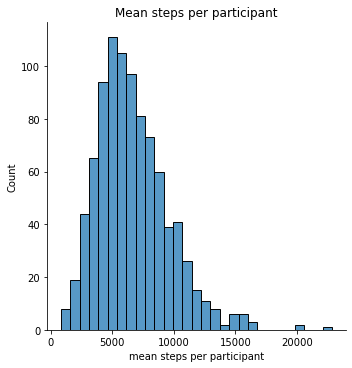

In [28]:

df['steps_mean'].name = 'mean steps per participant'
steps_mean = df['steps_mean'].dropna() 
sns.displot(steps_mean, kde=False) 
plt.title('Mean steps per participant')
plt.show()


Some things to note about this distribution:

It has several peaks on the left hand side of the graph. 
It has a 'tail' on the right which means that the distribution is right-skewed. 
When the distribution is right-skewed, the mean is higher than the median. 


### The relation of mean steps per participant with a gender

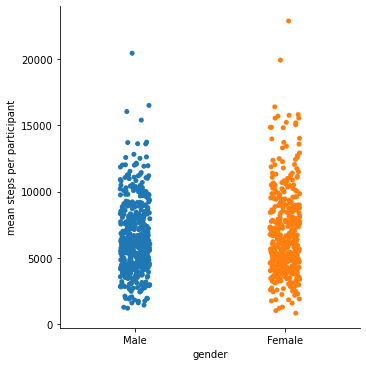

In [29]:
sns.catplot(x="gender", y="steps_mean", data=df)

This scatter plot provides us with information on which gender has the highest mean steps per participant. We can see that there are more female plots which reach higher values compared to the male plots.

### The relation between two categorical variables

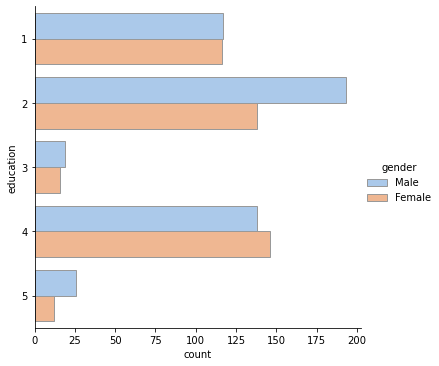

In [32]:
sns.catplot(y="education", hue="gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

This bar plot visualizes the relationship between education level and gender. The graph tells us that the distribution between male and female within education level 1 is quite even. There seem to be more males with education level 2. Education level 3 and 4 are both distributed quite evenly. More or less double the amount of males appear to have education level 5 which could be defined as a significant difference. 


In [33]:
pd.crosstab(df["education"], df["gender"])


gender,Female,Male
education,,
1,116,117
2,138,193
3,16,19
4,146,138
5,12,26


This cross table shows the level of education for both males and females. It is shown in absolute numbers which makes it hard to analyze. Therefore, I have created the following crosstab which contains proportional data. 

In [38]:
pd.crosstab(df["education"],df["gender"], normalize="columns")

gender,Female,Male
education,,
1,0.271028,0.237323
2,0.322430,0.391481
3,0.037383,0.038540
4,0.341121,0.279919
5,0.028037,0.052738
